# Modelo predictivo con series de tiempo

### Creación del ambiente

A través de la consolda de miniconda se crea un ambiente especifico para este ejercicio. Se crea, se activa y se define la carpeta donde se encontrará todos los archivos correspondientes.



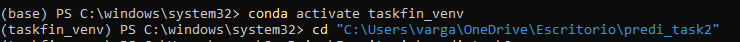

### API KEY 

Para conectarnos a los datos que se estudiarán en este ejercicio hacemos uso del API KEY generado.

API KEY: ckuin89r01qmtr8l8b30ckuin89r01qmtr8l8b3g

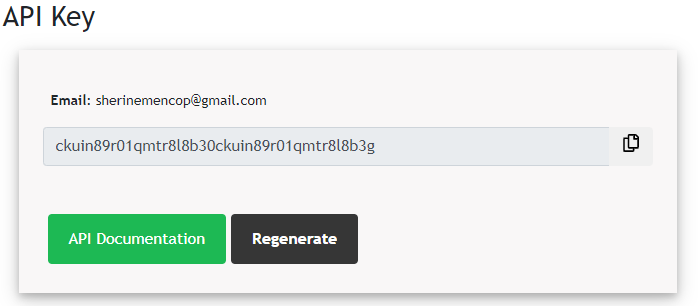

### Instalación de requerimientos y cargue de datos

A través de la consola de miniconda se ejecuta la instalación de las librerias necesarias: 

```PowerShell
pip install finnhub-python
pip install pandas
pip install datetime
pip install seaborn
```

In [64]:
import finnhub
import pandas as pd
from time import mktime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
#Para los temas
sns.set_theme()
sns.set_context("paper")

Para conectarnos con la data necesaria ejecutamos el siguiente código:

In [67]:
finnhub_client = finnhub.Client(api_key="ckuin89r01qmtr8l8b30ckuin89r01qmtr8l8b3g")

In [68]:
stock = 'BTC' ##Data de Bitcoin
resolution = 'D'

end_date = datetime.now()
start_date = end_date - timedelta(days=365)

In [69]:
end = int(end_date.timestamp())
start = int(start_date.timestamp())

In [70]:
BTC_res = finnhub_client.stock_candles(stock, resolution, start, end)


In [71]:
end = int(end_date.timestamp())
start = int(start_date.timestamp())

BTC_res = finnhub_client.stock_candles(stock, resolution, start, end)
BTC_df = pd.DataFrame(BTC_res)

BTC_df.head()

,c,h,l,o,s,t,v
0,88.9573,88.9573,88.9573,88.9573,ok,1667831400,2
1,89.1798,89.1801,88.8800,88.9900,ok,1667917800,3775
2,89.2600,89.3500,89.2100,89.2100,ok,1668004200,18223
3,90.4244,90.4419,90.2610,90.3900,ok,1668090600,24776
4,90.3750,90.5500,90.3650,90.5500,ok,1668177000,715


Con el siguiente código podemos arreglar los formatos de fecha 

In [72]:
def date_format(date_col):
    return datetime.fromtimestamp(date_col).strftime('%Y-%m-%d')

In [73]:
BTC_df['t'] = BTC_df['t'].apply(date_format)
BTC_df.head()

,c,h,l,o,s,t,v
0,88.9573,88.9573,88.9573,88.9573,ok,2022-11-07,2
1,89.1798,89.1801,88.8800,88.9900,ok,2022-11-08,3775
2,89.2600,89.3500,89.2100,89.2100,ok,2022-11-09,18223
3,90.4244,90.4419,90.2610,90.3900,ok,2022-11-10,24776
4,90.3750,90.5500,90.3650,90.5500,ok,2022-11-11,715


Reescribimos los nombres de las columnas con el objetivo de que sea más fácil la lectura e interpretacion de los mismos.

In [74]:
BTC_df.rename(columns = {'c':'Close','h':'High','l':'Low','o':'Open','t':'Date','v':'Volume'}, inplace = True)
BTC_df.drop('s', axis=1, inplace = True)
BTC_df.head()

,Close,High,Low,Open,Date,Volume
0,88.9573,88.9573,88.9573,88.9573,2022-11-07,2
1,89.1798,89.1801,88.8800,88.9900,2022-11-08,3775
2,89.2600,89.3500,89.2100,89.2100,2022-11-09,18223
3,90.4244,90.4419,90.2610,90.3900,2022-11-10,24776
4,90.3750,90.5500,90.3650,90.5500,2022-11-11,715


Graficamos la serie para tener una idea de como es el comportamiento de los datos. Esto nos puede dar un indicio si la serie presenta tendencia o no. 

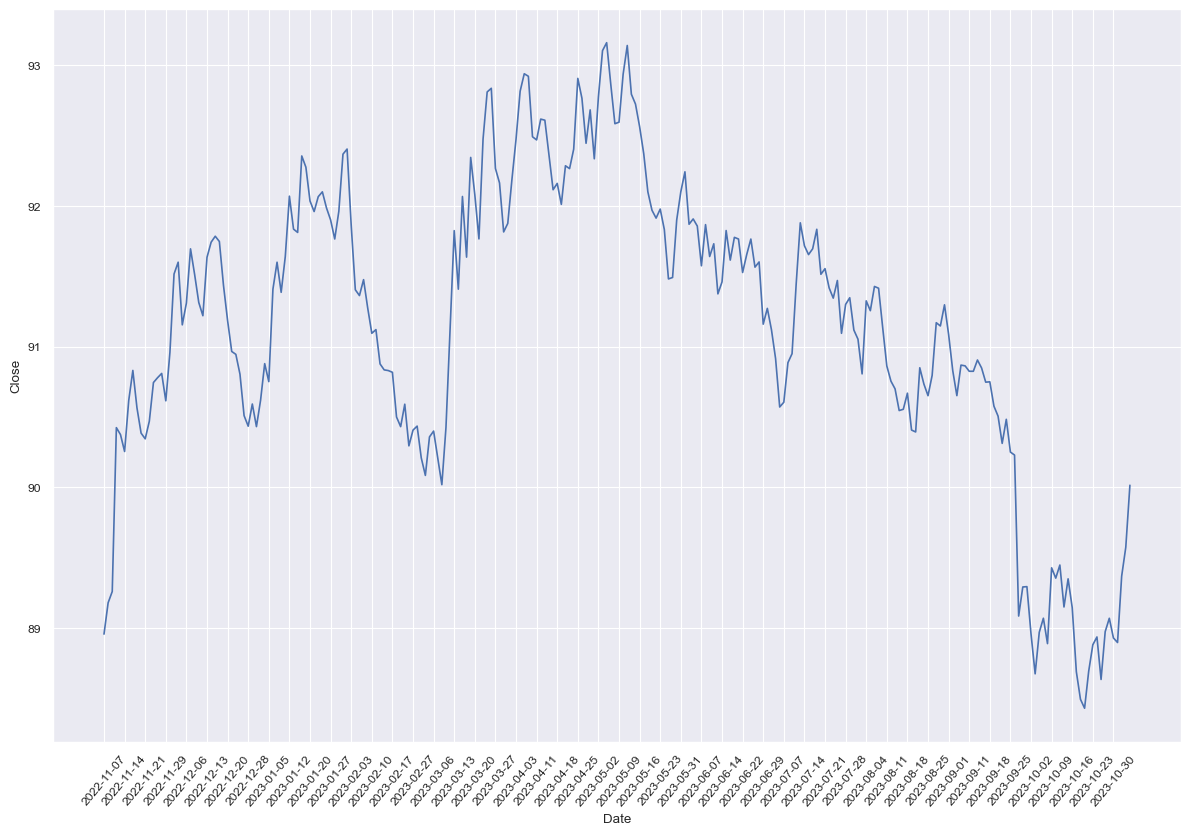

In [75]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=BTC_df, x="Date", y="Close")
freq = int(5)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
plt.tight_layout()
plt.xticks(rotation=50);

Para poder establecer un modelo de predicción para la serie de tiempo estudiada, la serie debe ser estacionaria. Es por ello, que se realiza la prueba Dickey-fuller para concluir sobre este aspecto

Se instalan las librerias necesarias antes de continuar (miniconda)
* pip install statsmodels


In [76]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [77]:
result = adfuller(BTC_df.Close)
print('BTC Statistic: %f' % result[0])
print('p-value: %f' % result[1])

BTC Statistic: -2.455745
p-value: 0.126617


En este caso, el valor p es 0.126617, que es mayor que 0.05. Esto significa que no podemos rechazar la hipótesis nula de que la serie de tiempo no es estacionaria. En otras palabras, la prueba de Dickey-Fuller no proporciona suficiente evidencia para concluir que la serie de tiempo es estacionaria.

Los resultados de la prueba de Dickey-Fuller sugieren que la serie de tiempo BTC no es estacionaria, ya que el valor p es mayor que 0.05. Esto significa que la serie de tiempo puede tener tendencia y no es adecuada para ciertas técnicas de análisis de series de tiempo que requieren estacionariedad.

Para visualizar este hecho, se expondrá las figuras de autocorrelación con el siguiente código

In [78]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

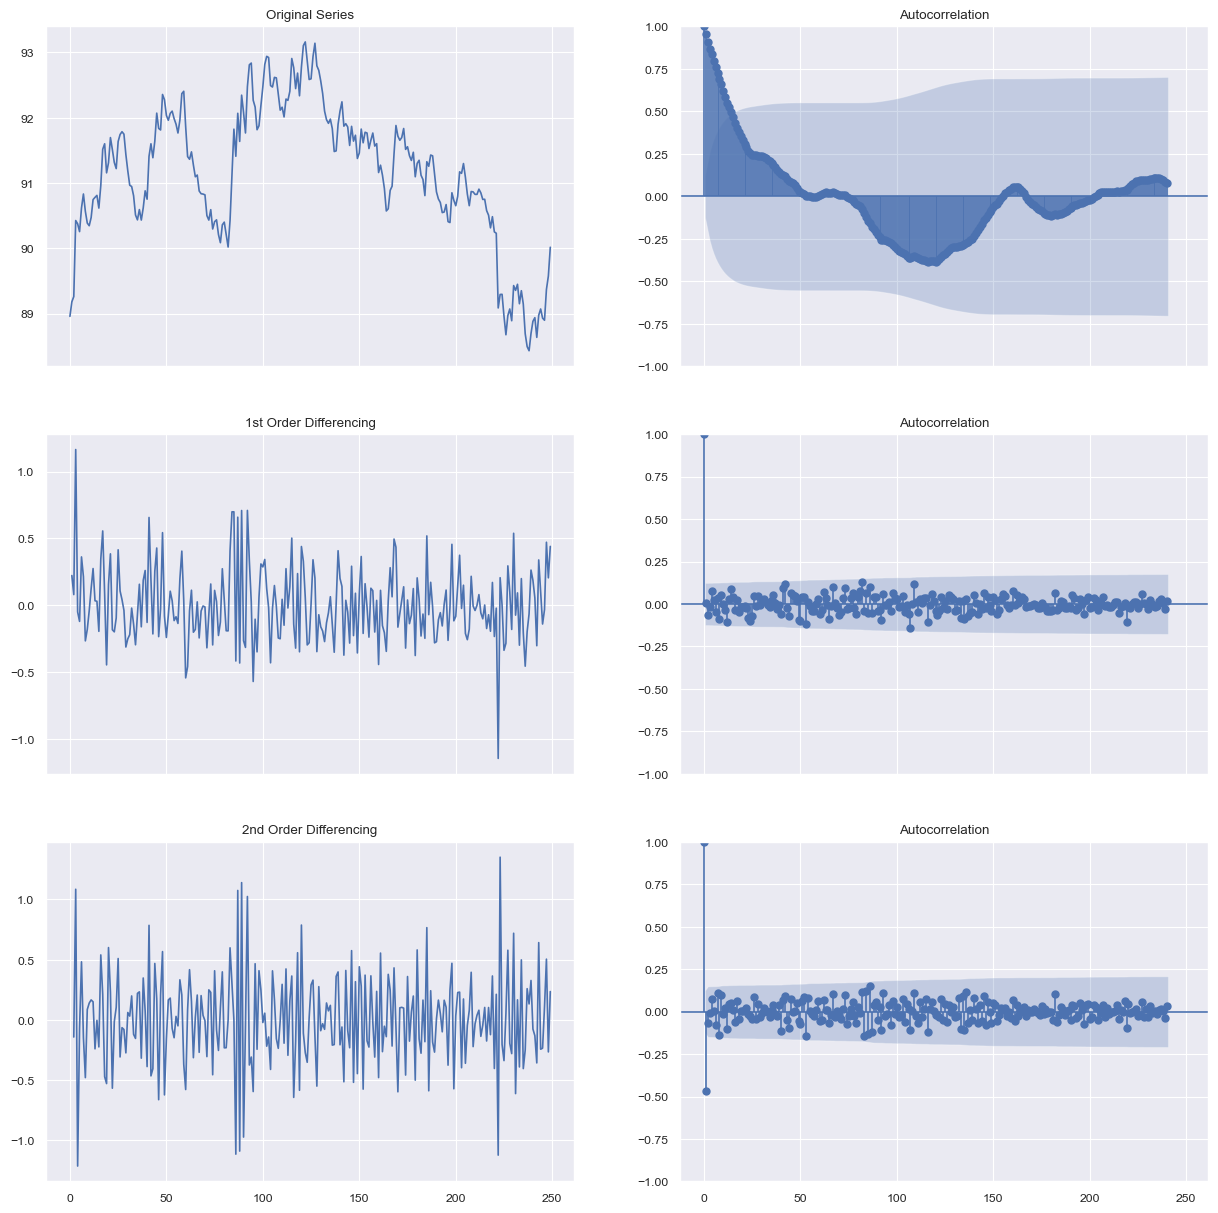

In [79]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(BTC_df.Close); axes[0, 0].set_title('Original Series')
plot_acf(BTC_df.Close, ax=axes[0, 1], lags = 240);

axes[1, 0].plot(BTC_df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(BTC_df.Close.diff().dropna(), ax=axes[1, 1], lags = 240);

axes[2, 0].plot(BTC_df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(BTC_df.Close.diff().diff().dropna(), ax=axes[2, 1], lags = 240);

En este grafico se presentan tres situaciones respecto al comportamiento de la serie y autocorrelación: 
* Serie actual. Se evidencia el comportamiento de la serie. Asimismo, se evidencia el grafico de correclación donde podemos ver que varias barras rompen los intervalos de confianza definifos. Por lo que podemos decir, que se evidencia que la serie no es estacionaria, tal como lo habiamos probado anteriormente con la prueba de Dickey Fuller.
* Serie diferenciada una vez. Vemos que al diferenciar la serie se vuelve más estable y su gráfico de correlación no rompe los limites del intervalo. Lo que podría sugerir la diferenciación de la serie en un nivel
* Serie diferenciada dos veces. Se puede notar que al diferencias la serie dos veces hay perturbaciones más notorias, apesar que su gráfico de correlación indica estacionariedad. Esto implica sobrediferenciación

CONJUNTO DE ENTRENAMIENTO/TEST

Para definir el conjunto de entrenamiento/test tenemos en cuenta lo conversado y se define en 28 días. De esta forma, nuestro conjunto test corresponde a los últimos 28 datos y el de entrenamiento corresponde a todos los datos menos estos 28.

In [132]:
n_BTC = len(BTC_df.Close); n_test = 28 
train_size = n_BTC - n_test

train = BTC_df.Close.iloc[:train_size]
dates_train = BTC_df.Date.iloc[:train_size]
test_1w = BTC_df.Close.iloc[train_size:train_size + n_test] 
dates_1w = BTC_df.Date.iloc[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_1w:", test_1w.shape)

train: (222,)
test_1w: (28,)


In [133]:
train_df = BTC_df[["Date", "Close"]].iloc[:train_size]
test_1w_df = BTC_df[["Date", "Close"]].iloc[train_size:train_size + n_test] 

ENCONTRAR MODELO ARIMA

Para encontrar el modelo arima, se utilizan las siguientes lobrerias y codigos.

In [83]:
from statsmodels.tsa.arima.model import ARIMA #libreria para encontrar arima
import warnings 
warnings.filterwarnings("ignore")

In [84]:
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5) #Numero de veces que se va a aplicar el ciclo para encontrar el mejor modelo. Encontrará los mejores parametro para AR() y MA()
d_rng  = range(3) #cantidad de veces a estudiar de las posibles diferenciaciones. Por eso lo dejamos hasta 3 porque según evidenciamos anteriormente, la diferenciación de nivel dos da indicios de un sobrediferenciación.

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                # print(i, d, j)
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue

In [85]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 46.41841 | order: (0, 1, 0)


Esto nos indica que el mejor modelo es ARIMA (0,1,0), lo que indica que se realiza una diferenciación de primer orden y que no tiene componetes autorregresivos ni media móvil.

Podemos hacer uso de una función auto arima para generar el mejor modelo con el mejor aic

In [86]:
import pmdarima as pm

model = pm.arima.auto_arima(train, information_criterion='aic', start_p=1, start_q=1,
                       
                      max_p=3, max_q=3,  # Máximo p y q
                      m=1,               # Frecuencia de la serie
                      d=None,            # Dejar que el modelo determine 'd'
                      seasonal=False,    # No hay estacionalidad
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=49.950, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48.316, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50.268, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50.257, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46.418, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.498 seconds


Podemos evidenciar, que con ambos métodos llegamos a la misma conclusión. El mejor modelo obtenido para la serie de tiempo BTC correspone a un ARIMA(0,1,0)(0,0,0)[0] . Este modelo indica que se diferencia una vez, no tiene componenetes autorregresivos ni media móvil. Tampoco tiene componentes derivados de estacionalidad dado que la serie no presenta.

PARA PREDECIR

Se considera entonces el mejor modelo obtenido en el paso anterior, usuando inicialmente el conjunto de datos de entrenamiento

In [87]:
from statsmodels.graphics.tsaplots import plot_predict #libreria

In [88]:
model = ARIMA(train, order=best_order)
model_fit = model.fit()

Obtenemos los residuales del modelo ajustado

In [140]:
residuals= model_fit.resid

Para ser más visual, creamos un gráfico donde se evidencia la prediccion realizada junto a el conjunto de entrenamiento

<Figure size 1200x800 with 0 Axes>

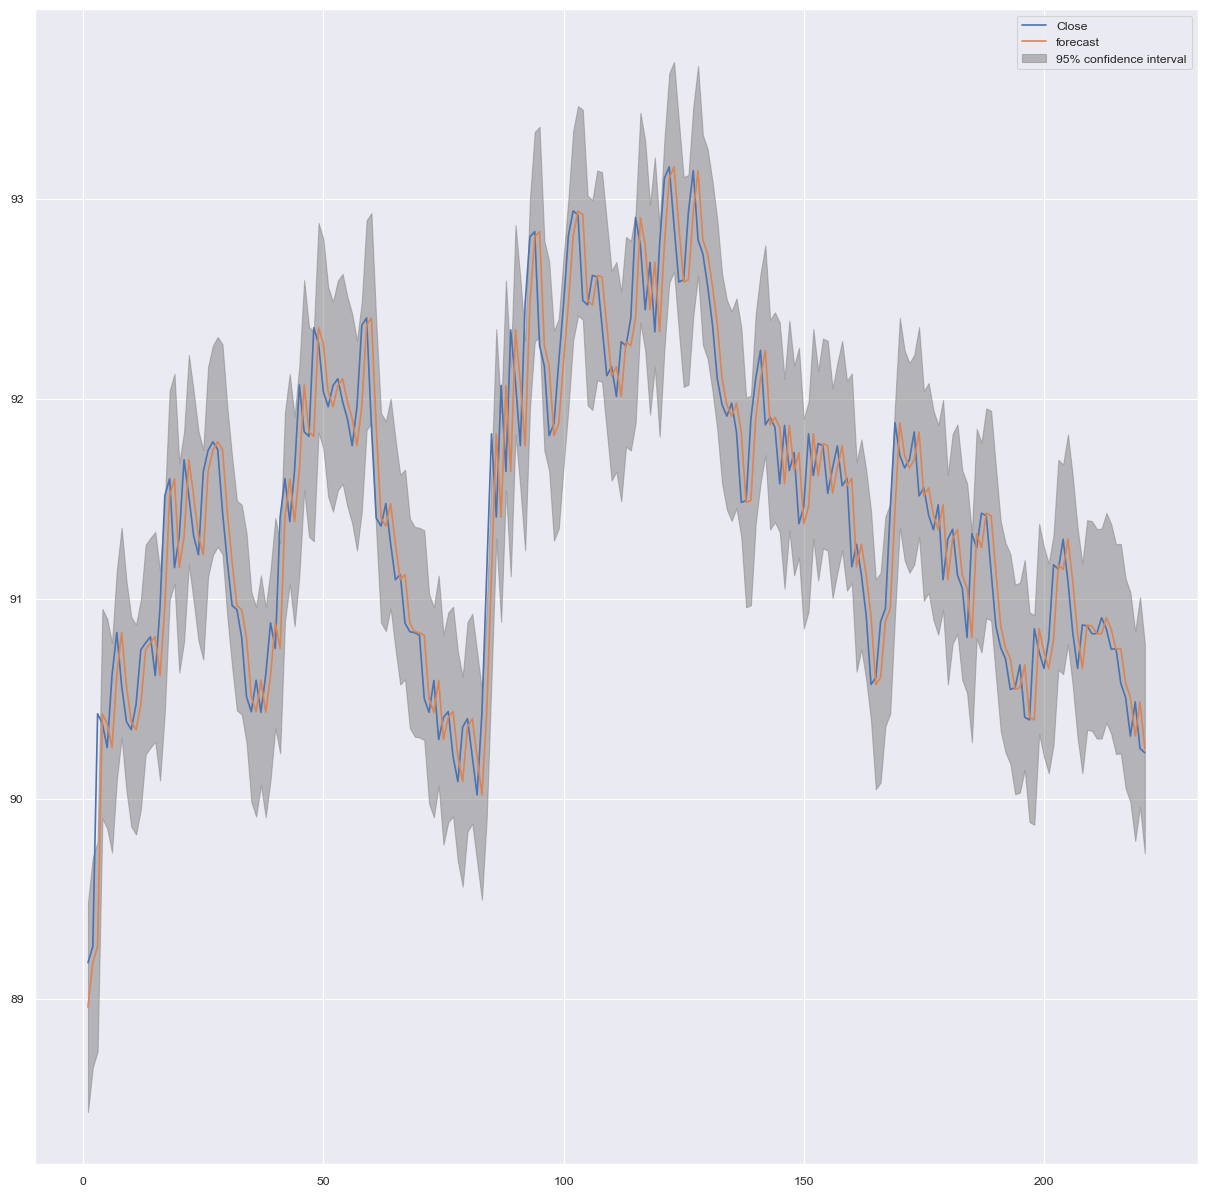

In [89]:
plt.figure(figsize = (12,8))
fig, ax = plt.subplots()
ax = train.loc[1:].plot(ax=ax)
plot_predict(model_fit, 1, ax=ax)
plt.show();

En este gráfico se evidencia la serie original (del conjunto de datos del entrenamiento) junto con el pronostico realizado. Asimimos el intervalo de confianza de la predicción. Se pude observar inicialmente un uen comportamiento y un buen ajuste. Sin embargo, procedemos a valdiar.

Revision de residuos

In [146]:
residuals = model_fit.resid

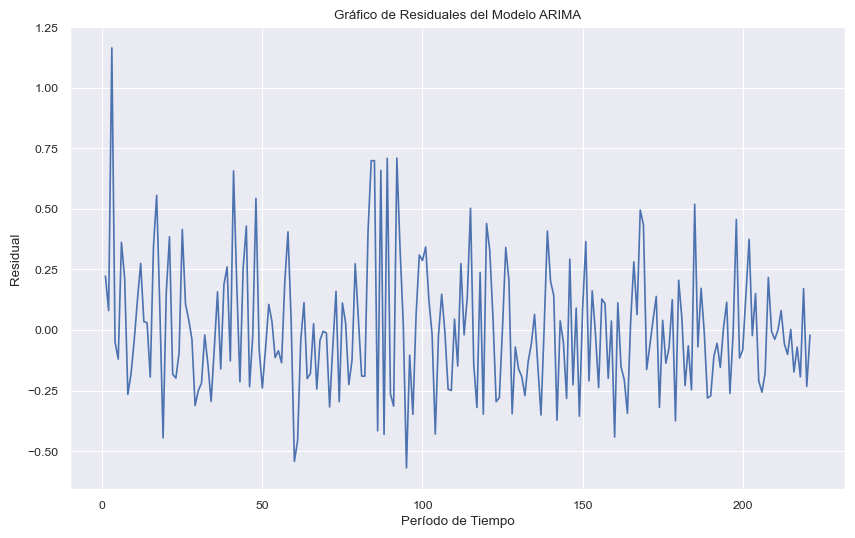

In [152]:
import matplotlib.pyplot as plt

# Obtén los residuales del modelo ARIMA
residuals = model_fit.resid

# Crea un gráfico de los residuales excluyendo el período de tiempo 0
plt.figure(figsize=(10, 6))
plt.plot(residuals[1:])  # Excluye el primer valor (período de tiempo 0)
plt.title('Gráfico de Residuales del Modelo ARIMA')
plt.xlabel('Período de Tiempo')
plt.ylabel('Residual')
plt.grid(True)
plt.show()


En este gráfico podemos ver que los residuos no se evidencian con algun tipo de correlación o dependencia.

REVISIÓN DE LA PREDICCIÓN CON RESPECTO AL CONJUNTO DE ENTRENAMIENTO

Para revisión hacemos uso de métricas: MAE, MSE, MAPE, RMSE, R2 con el siguiente código.

In [90]:
from sklearn.metrics import r2_score

Se define un función para calcular dichas métricas

In [91]:
def forecast_accuracy(forecast, actual, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2]},
                          index=[str_name])
    
    return df_acc

In [92]:
def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions

Una vez, obtenido estas funciones y además el modelo. Entonces procedemos a seccionar para realizar los pronosticos

* Para los 7 dias
Se define el corte para realizar el pronostico, se realzia el pronostico para los 7 días, se calculan las métricas correspondientes y se realiza prueba de normalidad para los residuales de este pronostico.

In [114]:
## 7 dias
n_BTC = len(BTC_df.Close); n_test = 7 
train_size = n_BTC - n_test

train = BTC_df.Close.iloc[:train_size]
dates_train = BTC_df.Date.iloc[:train_size]
test_7w = BTC_df.Close.iloc[train_size:train_size + n_test] 
dates_7w = BTC_df.Date.iloc[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_7w:", test_7w.shape)

train: (243,)
test_7w: (7,)


In [116]:
#test_7w: (7,) pronostico para 7 dias
test_7wl = test_7w.tolist()
yhat_7w  = arima_rolling(train.tolist(), test_7wl)

predicted=88.635000, expected=88.974400
predicted=88.974400, expected=89.069800
predicted=89.069800, expected=88.930000
predicted=88.930000, expected=88.897500
predicted=88.897500, expected=89.369200
predicted=89.369200, expected=89.574600
predicted=89.574600, expected=90.015000


In [117]:
#metricas para 7 dias
forecast_accuracy(np.array(test_7wl), np.array(yhat_7w), "7 dias")

,MAE,MSE,MAPE,RMSE,R2
7 dias,0.246371,0.086219,0.002765,0.293631,0.419094


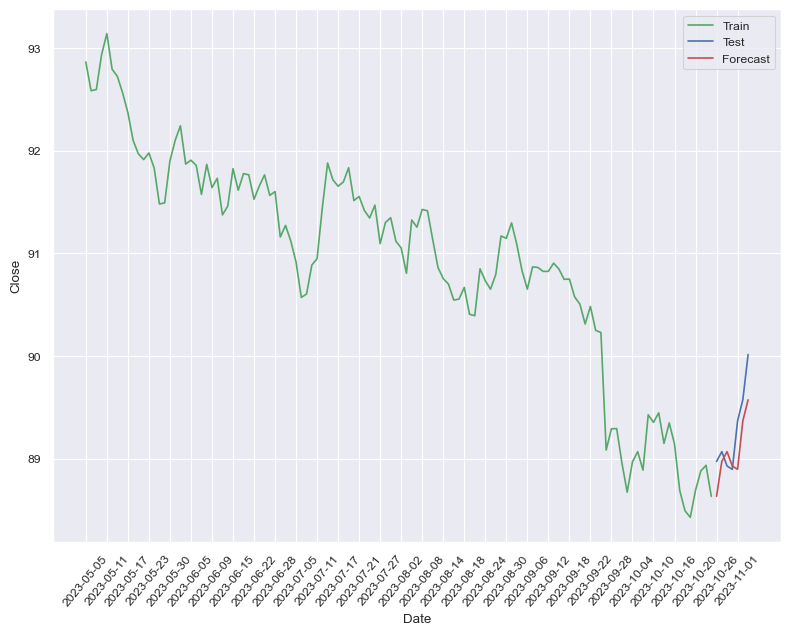

In [118]:
#Grafico para pronostico de 7 dias
plt.figure(figsize = (8, 6))
ax = sns.lineplot(x=dates_train[-120:], y=train[-120:], label="Train", color='g')
sns.lineplot(x=dates_7w, y=test_7wl, label="Test", color='b')
sns.lineplot(x=dates_7w, y=yhat_7w, label="Forecast", color='r')
freq = int(4)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
plt.tight_layout()
plt.xticks(rotation=50);

In [155]:
##Normalidad para la prediccion de los 7 dias
from scipy.stats import shapiro

# Calcula los residuales restando las predicciones reales a las predicciones
residuales = [obs - pred for obs, pred in zip(test_7wl, yhat_7w)]

# Realiza la prueba de normalidad de Shapiro-Wilk en los residuales
shapiro_stat, shapiro_p_value = shapiro(residuales)

# Imprime el resultado de la prueba de normalidad
print("Estadística de Shapiro-Wilk:", shapiro_stat)
print("P-valor de Shapiro-Wilk:", shapiro_p_value)

# Realiza una prueba de hipótesis para determinar si los residuales siguen una distribución normal
alpha = 0.05  # Nivel de significancia considerado para este ejercicio
if shapiro_p_value > alpha:
    print("Los residuales siguen una distribución normal (no se rechaza la hipótesis nula).")
else:
    print("Los residuales no siguen una distribución normal (se rechaza la hipótesis nula).")


Estadística de Shapiro-Wilk: 0.9418893456459045
P-valor de Shapiro-Wilk: 0.6557924747467041
Los residuales siguen una distribución normal (no se rechaza la hipótesis nula).


* Para los 14 dias
Se define el corte para realizar el pronostico, se realzia el pronostico para los 14 días, se calculan las métricas correspondientes y se realiza prueba de normalidad para los residuales de este pronostico.

In [119]:
## 14 dias
n_BTC = len(BTC_df.Close); n_test = 14 
train_size = n_BTC - n_test

train = BTC_df.Close.iloc[:train_size]
dates_train = BTC_df.Date.iloc[:train_size]
test_14w = BTC_df.Close.iloc[train_size:train_size + n_test] 
dates_14w = BTC_df.Date.iloc[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_14w:", test_14w.shape)

train: (236,)
test_14w: (14,)


In [120]:
#test_14w: (14,) pronostico para 14 dias
test_14wl = test_14w.tolist()
yhat_14w  = arima_rolling(train.tolist(), test_14wl)

predicted=89.145000, expected=88.690000
predicted=88.690000, expected=88.494100
predicted=88.494100, expected=88.430500
predicted=88.430500, expected=88.694100
predicted=88.694100, expected=88.881400
predicted=88.881400, expected=88.937000
predicted=88.937000, expected=88.635000
predicted=88.635000, expected=88.974400
predicted=88.974400, expected=89.069800
predicted=89.069800, expected=88.930000
predicted=88.930000, expected=88.897500
predicted=88.897500, expected=89.369200
predicted=89.369200, expected=89.574600
predicted=89.574600, expected=90.015000


In [121]:
#metricas para 14 dias
forecast_accuracy(np.array(test_14wl), np.array(yhat_14w), "14 dias")

,MAE,MSE,MAPE,RMSE,R2
14 dias,0.231971,0.075132,0.002607,0.274102,0.566603


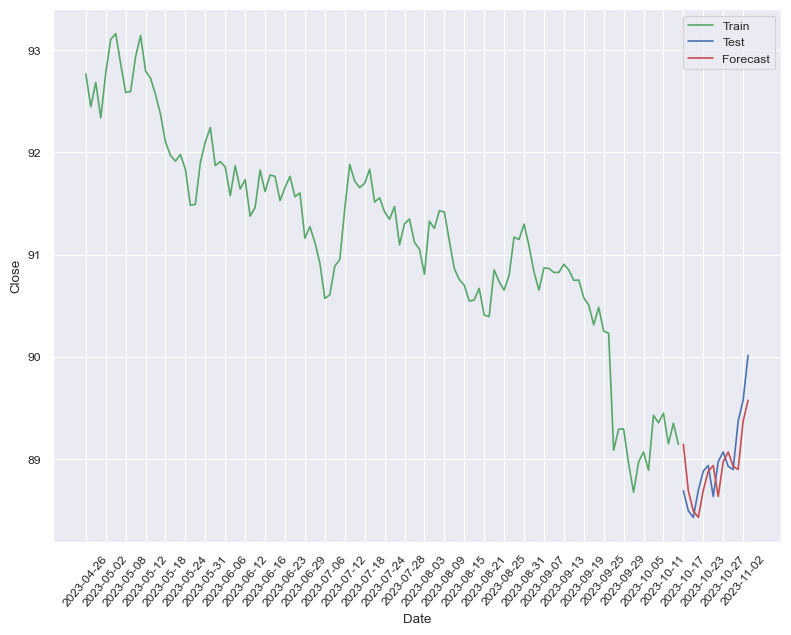

In [122]:
#Grafico para pronostico de 14 dias
plt.figure(figsize = (8, 6))
ax = sns.lineplot(x=dates_train[-120:], y=train[-120:], label="Train", color='g')
sns.lineplot(x=dates_14w, y=test_14wl, label="Test", color='b')
sns.lineplot(x=dates_14w, y=yhat_14w, label="Forecast", color='r')
freq = int(4)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
plt.tight_layout()
plt.xticks(rotation=50);

In [156]:
##Normalidad para la prediccion de los 14 dias
from scipy.stats import shapiro

# Calcula los residuales restando las predicciones reales a las predicciones
residuales = [obs - pred for obs, pred in zip(test_14wl, yhat_14w)]

# Realiza la prueba de normalidad de Shapiro-Wilk en los residuales
shapiro_stat, shapiro_p_value = shapiro(residuales)

# Imprime el resultado de la prueba de normalidad
print("Estadística de Shapiro-Wilk:", shapiro_stat)
print("P-valor de Shapiro-Wilk:", shapiro_p_value)

# Realiza una prueba de hipótesis para determinar si los residuales siguen una distribución normal
alpha = 0.05  # Nivel de significancia considerado para este ejercicio
if shapiro_p_value > alpha:
    print("Los residuales siguen una distribución normal (no se rechaza la hipótesis nula).")
else:
    print("Los residuales no siguen una distribución normal (se rechaza la hipótesis nula).")


Estadística de Shapiro-Wilk: 0.9775046110153198
P-valor de Shapiro-Wilk: 0.9577539563179016
Los residuales siguen una distribución normal (no se rechaza la hipótesis nula).


* Para los 21 dias
Se define el corte para realizar el pronostico, se realzia el pronostico para los 21 días, se calculan las métricas correspondientes y se realiza prueba de normalidad para los residuales de este pronostico.

In [123]:
## 21 dias
n_BTC = len(BTC_df.Close); n_test = 21 
train_size = n_BTC - n_test

train = BTC_df.Close.iloc[:train_size]
dates_train = BTC_df.Date.iloc[:train_size]
test_21w = BTC_df.Close.iloc[train_size:train_size + n_test] 
dates_21w = BTC_df.Date.iloc[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_21w:", test_21w.shape)

train: (229,)
test_21w: (21,)


In [124]:
#test_21w: (21,) pronostico para 21 dias
test_21wl = test_21w.tolist()
yhat_21w  = arima_rolling(train.tolist(), test_21wl)

predicted=89.070000, expected=88.889700
predicted=88.889700, expected=89.428400
predicted=89.428400, expected=89.355000
predicted=89.355000, expected=89.448100
predicted=89.448100, expected=89.150100
predicted=89.150100, expected=89.350000
predicted=89.350000, expected=89.145000
predicted=89.145000, expected=88.690000
predicted=88.690000, expected=88.494100
predicted=88.494100, expected=88.430500
predicted=88.430500, expected=88.694100
predicted=88.694100, expected=88.881400
predicted=88.881400, expected=88.937000
predicted=88.937000, expected=88.635000
predicted=88.635000, expected=88.974400
predicted=88.974400, expected=89.069800
predicted=89.069800, expected=88.930000
predicted=88.930000, expected=88.897500
predicted=88.897500, expected=89.369200
predicted=89.369200, expected=89.574600
predicted=89.574600, expected=90.015000


In [125]:
#metricas para 21 dias
forecast_accuracy(np.array(test_21wl), np.array(yhat_21w), "21 dias")

,MAE,MSE,MAPE,RMSE,R2
21 dias,0.230286,0.074257,0.002587,0.272501,0.486951


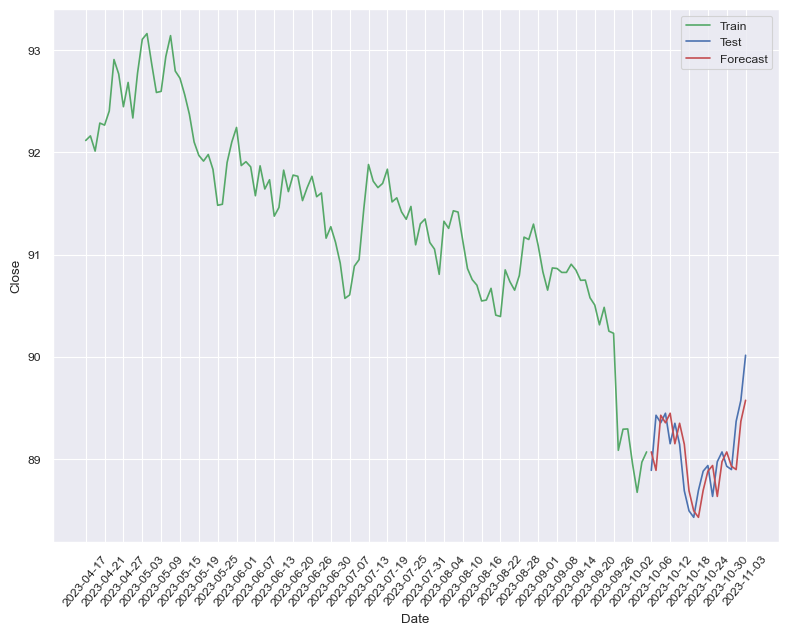

In [128]:
#Grafico para pronostico de 21 dias
plt.figure(figsize = (8, 6))
ax = sns.lineplot(x=dates_train[-120:], y=train[-120:], label="Train", color='g')
sns.lineplot(x=dates_21w, y=test_21wl, label="Test", color='b')
sns.lineplot(x=dates_21w, y=yhat_21w, label="Forecast", color='r')
freq = int(4)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
plt.tight_layout()
plt.xticks(rotation=50);

In [157]:
##Normalidad para la prediccion de los 21 dias
from scipy.stats import shapiro

# Calcula los residuales restando las predicciones reales a las predicciones
residuales = [obs - pred for obs, pred in zip(test_21wl, yhat_21w)]

# Realiza la prueba de normalidad de Shapiro-Wilk en los residuales
shapiro_stat, shapiro_p_value = shapiro(residuales)

# Imprime el resultado de la prueba de normalidad
print("Estadística de Shapiro-Wilk:", shapiro_stat)
print("P-valor de Shapiro-Wilk:", shapiro_p_value)

# Realiza una prueba de hipótesis para determinar si los residuales siguen una distribución normal
alpha = 0.05  # Nivel de significancia considerado para este ejercicio
if shapiro_p_value > alpha:
    print("Los residuales siguen una distribución normal (no se rechaza la hipótesis nula).")
else:
    print("Los residuales no siguen una distribución normal (se rechaza la hipótesis nula).")


Estadística de Shapiro-Wilk: 0.9752776026725769
P-valor de Shapiro-Wilk: 0.8445156812667847
Los residuales siguen una distribución normal (no se rechaza la hipótesis nula).


* Para los 28 dias
Se define el corte para realizar el pronostico, se realzia el pronostico para los 28 días, se calculan las métricas correspondientes y se realiza prueba de normalidad para los residuales de este pronostico.

In [129]:
#test_1w: (28,) pronostico para 28 dias
test_1wl = test_1w.tolist()
yhat_1w  = arima_rolling(train.tolist(), test_1wl)

predicted=89.070000, expected=89.085600
predicted=89.085600, expected=89.292200
predicted=89.292200, expected=89.294600
predicted=89.294600, expected=88.958500
predicted=88.958500, expected=88.675000
predicted=88.675000, expected=88.970000
predicted=88.970000, expected=89.070000
predicted=89.070000, expected=88.889700
predicted=88.889700, expected=89.428400
predicted=89.428400, expected=89.355000
predicted=89.355000, expected=89.448100
predicted=89.448100, expected=89.150100
predicted=89.150100, expected=89.350000
predicted=89.350000, expected=89.145000
predicted=89.145000, expected=88.690000
predicted=88.690000, expected=88.494100
predicted=88.494100, expected=88.430500
predicted=88.430500, expected=88.694100
predicted=88.694100, expected=88.881400
predicted=88.881400, expected=88.937000
predicted=88.937000, expected=88.635000
predicted=88.635000, expected=88.974400
predicted=88.974400, expected=89.069800
predicted=89.069800, expected=88.930000
predicted=88.930000, expected=88.897500


In [130]:
#metricas para 28 dias
forecast_accuracy(np.array(test_1wl), np.array(yhat_1w), "28 dias")

,MAE,MSE,MAPE,RMSE,R2
28 dias,0.216971,0.067596,0.002437,0.259992,0.429268


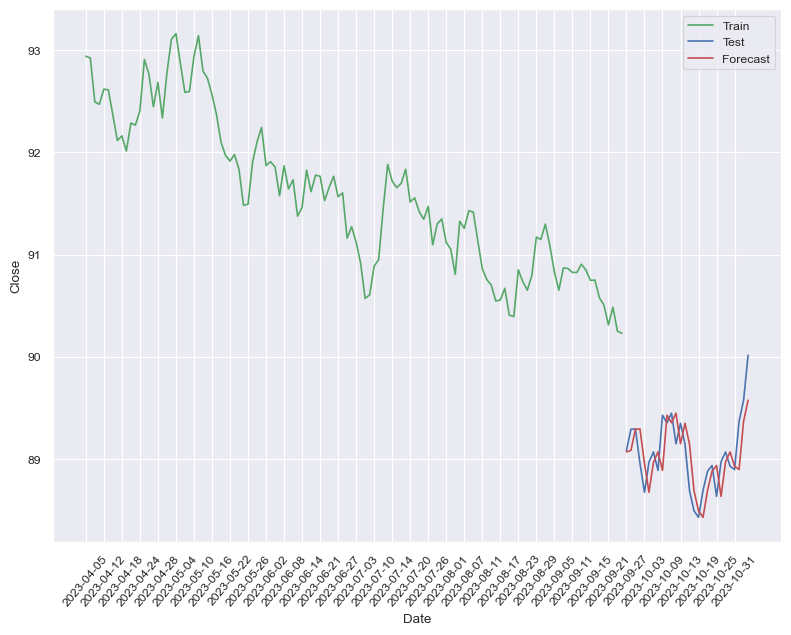

In [136]:
#Grafico para pronostico de 28 dias
plt.figure(figsize = (8, 6))
ax = sns.lineplot(x=dates_train[-120:], y=train[-120:], label="Train", color='g')
sns.lineplot(x=dates_1w, y=test_1wl, label="Test", color='b')
sns.lineplot(x=dates_1w, y=yhat_1w, label="Forecast", color='r')
freq = int(4)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
plt.tight_layout()
plt.xticks(rotation=50);

In [158]:
##Normalidad para la prediccion de los 28 dias
from scipy.stats import shapiro

# Calcula los residuales restando las predicciones reales a las predicciones
residuales = [obs - pred for obs, pred in zip(test_1wl, yhat_1w)]

# Realiza la prueba de normalidad de Shapiro-Wilk en los residuales
shapiro_stat, shapiro_p_value = shapiro(residuales)

# Imprime el resultado de la prueba de normalidad
print("Estadística de Shapiro-Wilk:", shapiro_stat)
print("P-valor de Shapiro-Wilk:", shapiro_p_value)

# Realiza una prueba de hipótesis para determinar si los residuales siguen una distribución normal
alpha = 0.05  # Nivel de significancia considerado para este ejercicio
if shapiro_p_value > alpha:
    print("Los residuales siguen una distribución normal (no se rechaza la hipótesis nula).")
else:
    print("Los residuales no siguen una distribución normal (se rechaza la hipótesis nula).")


Estadística de Shapiro-Wilk: 0.9795772433280945
P-valor de Shapiro-Wilk: 0.8401601910591125
Los residuales siguen una distribución normal (no se rechaza la hipótesis nula).


Resumen de metricas

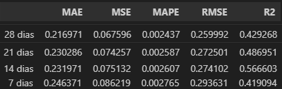

MAE (Error Absoluto Medio): Mide cuánto se equivoca, en promedio, el pronóstico en comparación con los valores reales. Un valor más bajo es mejor, y en este caso, es mejor para el pronóstico de 28 días.

MSE (Error Cuadrático Medio): Mide cuánto se equivoca, en promedio, el pronóstico, pero da más peso a los errores grandes. Un valor más bajo es mejor, y en este caso, es mejor para el pronóstico de 28 días.

MAPE (Error Porcentual Absoluto Medio): Mide cuánto se equivoca, en promedio, el pronóstico como porcentaje de los valores reales. Un valor más bajo es mejor, y en este caso, es mejor para el pronóstico de 28 días.

RMSE (Raíz del Error Cuadrático Medio): Es una medida similar al MSE pero más fácil de interpretar, ya que está en la misma escala que los datos. Un valor más bajo es mejor, y en este caso, es mejor para el pronóstico de 28 días.

R2 (Coeficiente de Determinación): Mide qué proporción de las diferencias entre el pronóstico y los valores reales puede explicarse por el modelo. Un valor más alto es mejor, y en este caso, es mejor para el pronóstico de 14 días.

En resumen, el pronóstico de 28 días tiene un mejor desempeño en términos de MAE, MSE, MAPE y RMSE, lo que indica que se equivoca menos en comparación con los valores reales. Sin embargo, el pronóstico de 14 días tiene un mejor ajuste del modelo, lo que significa que el modelo se ajusta mejor a los datos para ese período. La elección entre ambos dependerá de tus necesidades específicas.

BIC revision del modelo

In [ ]:
import pmdarima as pm

model = pm.arima.auto_arima(train, information_criterion='bic', start_p=1, start_q=1,
                       
                      max_p=3, max_q=3,  # Máximo p y q
                      m=1,               # Frecuencia de la serie
                      d=None,            # Dejar que el modelo determine 'd'
                      seasonal=False,    # No hay estacionalidad
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize bic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=63.543, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=55.112, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=60.462, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=60.452, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=49.817, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.059 seconds


Comparacion de AIC Vs BIC

In [107]:
import pmdarima as pm

# Modelo ARIMA según AIC
model_aic = pm.arima.auto_arima(train, information_criterion='aic', start_p=1, start_q=1,
                       max_p=3, max_q=3,  # Máximo p y q
                       m=1,               # Frecuencia de la serie
                       d=None,            # Dejar que el modelo determine 'd'
                       seasonal=False,    # No hay estacionalidad
                       start_P=0, 
                       D=0, 
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)

# Modelo ARIMA según BIC
model_bic = pm.arima.auto_arima(train, information_criterion='bic', start_p=1, start_q=1,
                       max_p=3, max_q=3,  # Máximo p y q
                       m=1,               # Frecuencia de la serie
                       d=None,            # Dejar que el modelo determine 'd'
                       seasonal=False,    # No hay estacionalidad
                       start_P=0, 
                       D=0, 
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)

# Imprimir los resultados de AIC y BIC
print("Modelo ARIMA según AIC:")
print(model_aic.summary())

print("\nModelo ARIMA según BIC:")
print(model_bic.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=69.082, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=65.231, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=67.227, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=67.226, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63.231, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.942 seconds
Performing stepwise search to minimize bic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=82.799, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=72.089, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=77.515, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=77.514, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=66.661, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.299 seconds
Modelo ARIMA según AIC:
                               SARIMAX Results                                
Dep. Variable:   

Para AIC (Criterio de Información de Akaike):

- Se realizaron pruebas con diferentes combinaciones de modelos ARIMA para encontrar el modelo que minimiza el valor de AIC. Las combinaciones incluyeron diferentes valores para el orden de autorregresión (p), el orden de integración (d), y el orden de media móvil (q).

- El mejor modelo encontrado según AIC es ARIMA(0,1,0)(0,0,0)[0] con un valor de AIC de 63.231. Este modelo tiene un orden (d) igual a 1 y no tiene componentes de autorregresión ni media móvil. El valor de AIC es una medida de que tanto se ajusta el modelo a los datos, y un valor más bajo indica un mejor ajuste.

Para BIC (Criterio de Información Bayesiano):

- Similar al caso de AIC, se realizaron pruebas con diferentes combinaciones de modelos ARIMA para minimizar el valor de BIC.

- El mejor modelo encontrado según BIC es también ARIMA(0,1,0)(0,0,0)[0] con un valor de BIC de 66.661. Al igual que en el caso de AIC, este modelo tiene un orden de integración (d) igual a 1 y no tiene componentes de autorregresión ni media móvil.

El modelo ARIMA seleccionado según AIC y BIC es el mismo, ARIMA(0,1,0)(0,0,0)[0]. Esto significa que este modelo es el que mejor se ajusta a los datos según ambos criterios. El valor negativo de log verosimilitud y el valor de AIC más bajo sugieren que el modelo es apropiado para el ajuste de los datos.